# Sampling using `sim_tools` classes

This notebook provides an overview of how to use the `Distribution` classes from the `sim_tools.distributions` module.

The classes are a higher level abstract of sampling from the numpy library. They encapsulate the distribution parameters, a random number generator instance, and a random seed.  For example, the code for the Triangular class is:

```python
class Exponential(Distribution):
    """
    Convenience class for the exponential distribution.
    packages up distribution parameters, seed and random generator.
    """

    def __init__(self, mean: float, random_seed: Optional[int] = None):
        """
        Constructor

        Params:
        ------
        mean: float
            The mean of the exponential distribution

        random_seed: int, optional (default=None)
            A random seed to reproduce samples.  If set to none then a unique
            sample is created.
        """
        super().__init__(random_seed)
        self.mean = mean

    @abstractmethod
    def sample(self, size: Optional[int] = None) -> float | np.ndarray:
        """
        Generate a sample from the exponential distribution

        Params:
        -------
        size: int, optional (default=None)
            the number of samples to return.  If size=None then a single
            sample is returned.
        """
        return self.rng.exponential(self.mean, size=size)

```

Here we can see that the `__init__` method accepts the distribution mean plus a random seed to control sampling from a `np.random.Generator` object.  The creation of the generator is done by the super class `Distribution`

The `sample` method delegates work to the `np.random.Generator` object.

The abstraction into a class enables the distribution to be used as a simple parameter in a model.

## Example output

The code below creates an instance of the distributions on offer. Here we used the `size`` parameter in `sample` to enable 

In [4]:
# import all distributions
from sim_tools.distributions import (Exponential, 
                                    Bernoulli, 
                                    Lognormal, 
                                    Normal, 
                                    Uniform, 
                                    Triangular,
                                    FixedDistribution, 
                                    CombinationDistribution)

### Create plots

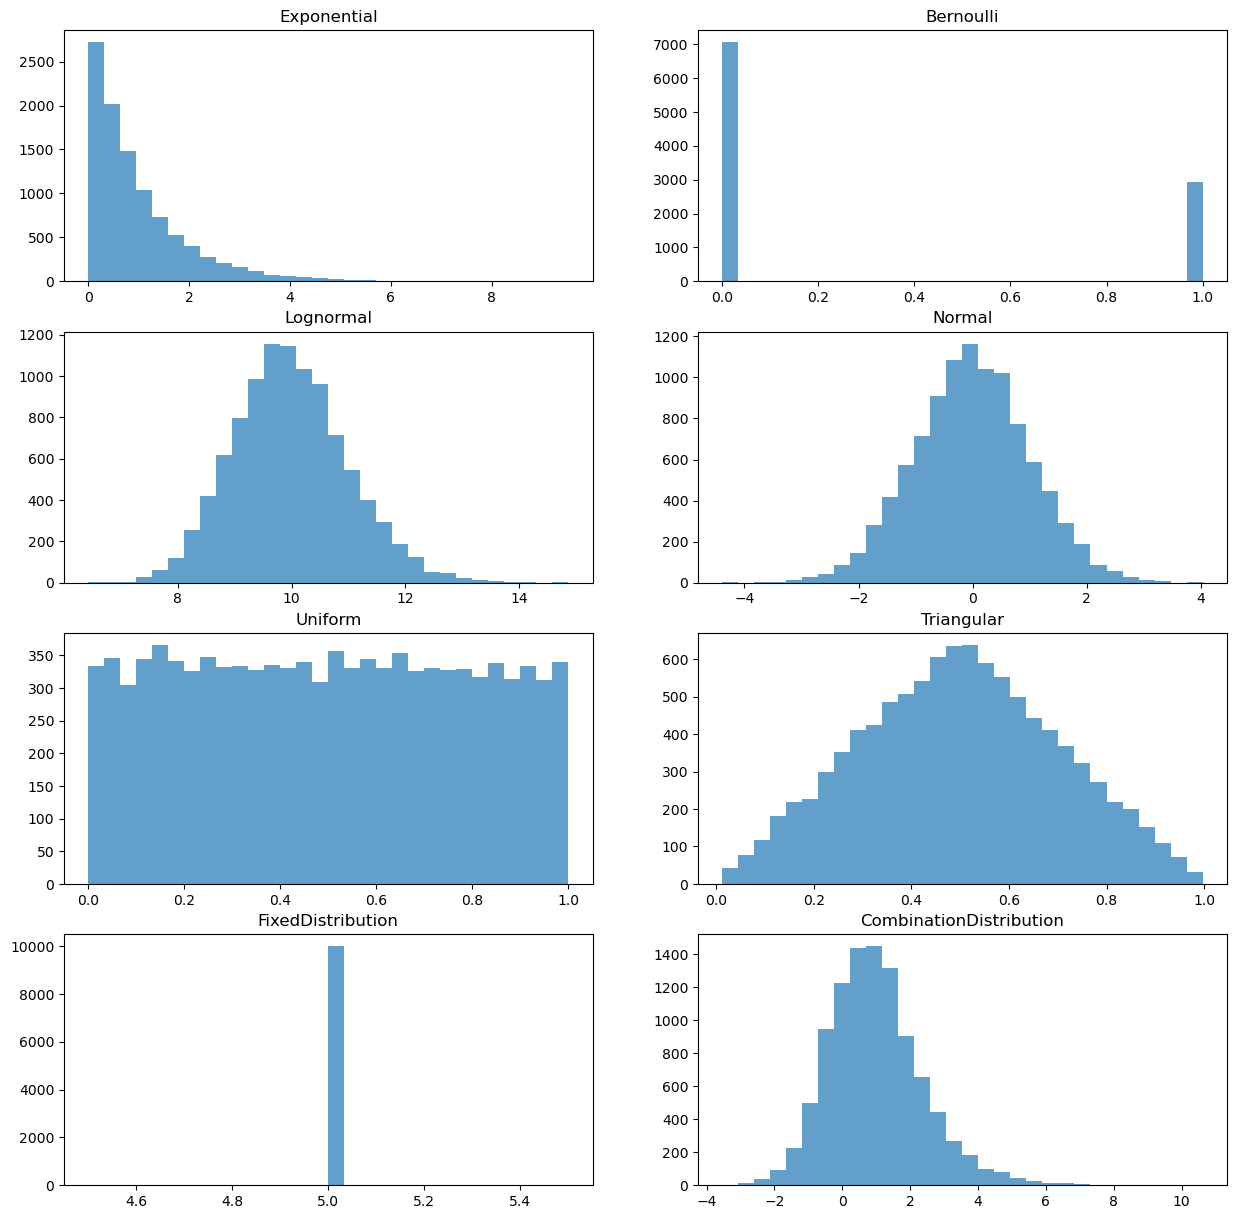

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create an instance of each distribution and generate 10,000 samples
distributions = [
    Exponential(mean=1.0, random_seed=42),
    Bernoulli(p=0.3, random_seed=42),
    Lognormal(mean=10, stdev=1, random_seed=42),
    Normal(mean=0, sigma=1, allow_neg=True, random_seed=42),
    Uniform(low=0, high=1, random_seed=42),
    Triangular(low=0, mode=0.5, high=1, random_seed=42),
    FixedDistribution(value=5),
    CombinationDistribution(Exponential(mean=1.0), Normal(mean=0, sigma=1, allow_neg=True))
]

fig, axs = plt.subplots(4, 2, figsize=(15, 15))

for i, distribution in enumerate(distributions):
    row = i // 2
    col = i % 2
    samples = distribution.sample(size=10000)
    axs[row, col].hist(samples, bins=30, alpha=0.7)
    axs[row, col].set_title(distribution.__class__.__name__)

plt.show()

## Single samples

In [5]:
arrival_dist = Exponential(mean=30, random_seed=42)
arrival_dist.sample()

72.12625811897983